In [30]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import root_mean_squared_error, accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor

In [2]:
data_path = '../monsters.csv'

In [3]:
df = pd.read_csv(data_path)

In [4]:
df.head() 

,Unnamed: 0,_id,Name,Type,Level,Rarity,Damage,Health,Energy,Sanity,Timestamp
0,0,6796c7a66b569906d83bf708,Skeletal Knight,Undead,6,Rank 2,6d6+3,38.17,33.86,37.41,2025-01-26 15:39:18
1,1,6796c7a66b569906d83bf709,Hook Horror,Demonic,17,Rank 1,17d4+1,69.99,66.87,67.32,2025-01-26 15:39:18
2,2,6796c7a66b569906d83bf70a,Shadow Spirit,Fey,5,Rank 4,5d10+2,47.15,48.12,53.70,2025-01-26 15:39:18
3,3,6796c7a66b569906d83bf70b,Ghostly Archer,Undead,9,Rank 4,9d10+1,92.02,92.03,93.40,2025-01-26 15:39:18
4,4,6796c7a66b569906d83bf70c,Hook Horror,Demonic,14,Rank 3,14d8+1,112.58,114.07,108.18,2025-01-26 15:39:18


In [5]:
dropees = ['Unnamed: 0', '_id', 'Name', 'Type', 'Damage', 'Timestamp']
df.drop(columns=dropees, inplace=True)

In [6]:
target_c = df['Rarity']
target_r = [int(x.split()[1]) for x in df['Rarity']]
features = df.drop('Rarity', axis=1)

#### Regression Variables

In [7]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(features, target_r, test_size=0.2, random_state=7)

#### Classification Variables

In [8]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(features, target_c, test_size=0.2, random_state=7)

# Model 1 - XGB Regressor

In [9]:
model1 = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=7
)

In [10]:
model1.fit(X_train_r, y_train_r)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=7, ...)

In [11]:
y_train_pred = model1.predict(X_train_r)
y_test_pred = model1.predict(X_test_r)

In [12]:
train_score = model1.score(X_train_r, y_train_r)
test_score = model1.score(X_test_r, y_test_r)

print(f'Train r2 - {train_score}')
print(f'Test r2 - {test_score}')

Train r2 - 0.9995452165603638
Test r2 - 0.972805917263031


In [13]:
rmse_train = root_mean_squared_error(y_train_r, y_train_pred)
rmse_test = root_mean_squared_error(y_test_r, y_test_pred)

print(f'Train rmse - {rmse_train}')
print(f'Test rmse - {rmse_test}')

Train rmse - 0.02998613379895687
Test rmse - 0.23667220771312714


## Visuals

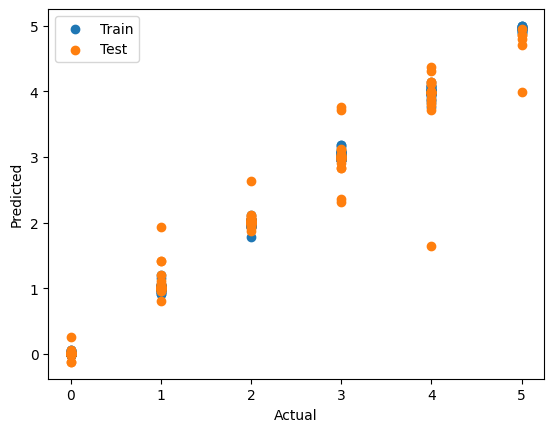

In [39]:
plt.scatter(y_train_r, y_train_pred, label='Train')
plt.scatter(y_test_r, y_test_pred, label='Test')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend() 
plt.show()

In [15]:
residual_train = y_train_r - y_train_pred
residual_test = y_test_r - y_test_pred

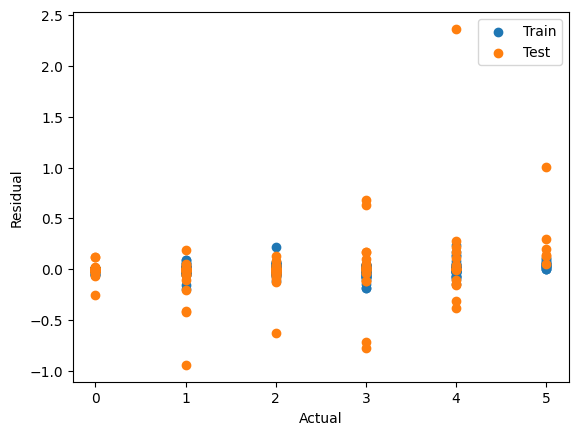

In [38]:
plt.scatter(y_train_r, residual_train, label='Train')
plt.scatter(y_test_r, residual_test, label='Test')
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.legend()
plt.show()

# Model 2 - Random Forest Classifier

Random Forest Classifier was my best performing model by a very small amount, it beat out XGBRegressor by 0.003. RFC finished with a final accuracy of 0.975 or 97.5%. RFC predicted nearly every rank perfectly except for Rank 4 which has some outliers that seem like they can be Rank 3 or Rank 5. When looking at the confusion matrix it seems that the predictions it gets wrong were probably outliers. This makes sense since RFC is the first model that came to mind when looking at the graph of the data on my Bandersnatch view page. Using our features energy, health, level, and sanity we see that level is the most important feature when it comes to predicting the rank of our monsters. 

In [18]:
model2 = RandomForestClassifier(n_estimators=100, random_state=7)

In [19]:
model2.fit(X_train_c, y_train_c)

RandomForestClassifier(random_state=7)

In [20]:
y_pred = model2.predict(X_test_c)

In [21]:
accuracy = accuracy_score(y_test_c, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.975


In [22]:
print(confusion_matrix(y_test_c, y_pred))

[[65  0  0  0  0  0]
 [ 1 45  0  0  0  0]
 [ 0  0 41  0  0  0]
 [ 0  0  0 22  1  0]
 [ 0  1  0  0 18  0]
 [ 0  0  0  0  2  4]]


In [23]:
print(classification_report(y_test_c, y_pred))

              precision    recall  f1-score   support

      Rank 0       0.98      1.00      0.99        65
      Rank 1       0.98      0.98      0.98        46
      Rank 2       1.00      1.00      1.00        41
      Rank 3       1.00      0.96      0.98        23
      Rank 4       0.86      0.95      0.90        19
      Rank 5       1.00      0.67      0.80         6

    accuracy                           0.97       200
   macro avg       0.97      0.92      0.94       200
weighted avg       0.98      0.97      0.97       200



## Visuals

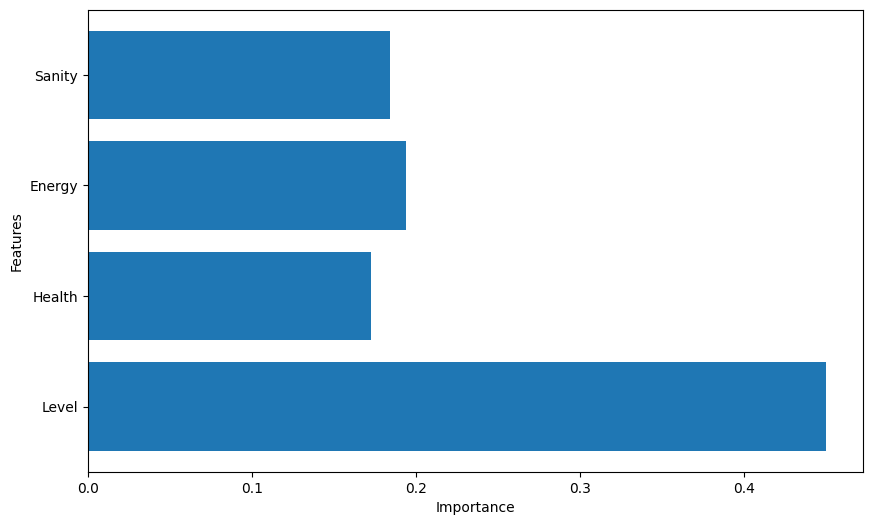

In [29]:
feature_importance = model2.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, tick_label=features.columns)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Model 3 - Decision Tree Classifier

In [31]:
model3 = DecisionTreeClassifier(random_state=7)

In [32]:
model3.fit(X_train_c, y_train_c)

DecisionTreeClassifier(random_state=7)

In [33]:
y_pred = model3.predict(X_test_c)

In [34]:
accuracy = accuracy_score(y_test_c, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.895


In [35]:
print(confusion_matrix(y_test_c, y_pred))

[[63  2  0  0  0  0]
 [ 2 42  2  0  0  0]
 [ 0  1 40  0  0  0]
 [ 0  0  2 20  1  0]
 [ 0  1  0  4 10  4]
 [ 0  0  0  0  2  4]]


In [37]:
print(classification_report(y_test_c, y_pred))

              precision    recall  f1-score   support

      Rank 0       0.97      0.97      0.97        65
      Rank 1       0.91      0.91      0.91        46
      Rank 2       0.91      0.98      0.94        41
      Rank 3       0.83      0.87      0.85        23
      Rank 4       0.77      0.53      0.62        19
      Rank 5       0.50      0.67      0.57         6

    accuracy                           0.90       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.90      0.90      0.89       200

